In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
deliveries = pd.read_csv('F:/PRATHMESH/deliveries.csv')
matches=pd.read_csv("F:/PRATHMESH/matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches["team1"].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [6]:
matches["team2"].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Chennai Super Kings            110
Royal Challengers Bangalore    105
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Gujarat Lions                   14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Royal Challengers Bengaluru      6
Name: count, dtype: int64

In [7]:
deliveries["batting_team"].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [8]:
deliveries["bowling_team"].value_counts()

bowling_team
Mumbai Indians                 31505
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Royal Challengers Bangalore    28358
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad            21717
Delhi Daredevils               18725
Delhi Capitals                 11216
Deccan Chargers                 9039
Punjab Kings                    6719
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions                   3545
Rising Pune Supergiant          1928
Royal Challengers Bengaluru     1801
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [17]:
matches['city'].isna().sum()

51

In [19]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

# DATA CLEANING

In [22]:
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\1679708745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\1679708745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [24]:
deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
deliveries['bowling_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\2335878892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['batting_team'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\2335878892.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [26]:
matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)


In [28]:
deliveries['batting_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)
deliveries['bowling_team'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'}, inplace=True)


In [30]:
matches["team1"].value_counts()

team1
Royal Challengers Bangalore    144
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Pune Warriors                   23
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [32]:
matches["team2"].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Royal Challengers Bangalore    111
Chennai Super Kings            110
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Rising Pune Supergiant          16
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [34]:
deliveries["bowling_team"].value_counts()

bowling_team
Mumbai Indians                 31505
Royal Challengers Bangalore    30159
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad            21717
Delhi Daredevils               18725
Delhi Capitals                 11216
Deccan Chargers                 9039
Punjab Kings                    6719
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions                   3545
Rising Pune Supergiant          3543
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [36]:
deliveries["batting_team"].value_counts()

batting_team
Mumbai Indians                 31437
Royal Challengers Bangalore    30023
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64

In [38]:
matches['city'].fillna('Unknown',inplace=True)
matches['method'].fillna("Non D/L",inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\4123078599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Unknown',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6496\4123078599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [40]:
matches['city'].isna().sum()

0

In [42]:
matches['method'].value_counts()

method
Non D/L    1074
D/L          21
Name: count, dtype: int64

# analysis work

success rate of teams.

In [46]:
matches_won= matches['winner'].value_counts()
matches_won

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    123
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

In [48]:
matches_played=matches['team1'].value_counts() + matches['team2'].value_counts()
matches_played

Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                  91
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  45
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          30
Royal Challengers Bangalore    255
Sunrisers Hyderabad            182
Name: count, dtype: int64

In [50]:
success_rates=matches_won/matches_played
success_rates

Chennai Super Kings            0.579832
Deccan Chargers                0.386667
Delhi Capitals                 0.527473
Delhi Daredevils               0.416149
Gujarat Lions                  0.433333
Gujarat Titans                 0.622222
Kings XI Punjab                0.463158
Kochi Tuskers Kerala           0.428571
Kolkata Knight Riders          0.521912
Lucknow Super Giants           0.545455
Mumbai Indians                 0.551724
Pune Warriors                  0.260870
Punjab Kings                   0.428571
Rajasthan Royals               0.506787
Rising Pune Supergiant         0.500000
Royal Challengers Bangalore    0.482353
Sunrisers Hyderabad            0.483516
Name: count, dtype: float64

In [52]:
success_rates_descending=success_rates.sort_values(ascending=False)
success_rates_descending                                               

Gujarat Titans                 0.622222
Chennai Super Kings            0.579832
Mumbai Indians                 0.551724
Lucknow Super Giants           0.545455
Delhi Capitals                 0.527473
Kolkata Knight Riders          0.521912
Rajasthan Royals               0.506787
Rising Pune Supergiant         0.500000
Sunrisers Hyderabad            0.483516
Royal Challengers Bangalore    0.482353
Kings XI Punjab                0.463158
Gujarat Lions                  0.433333
Kochi Tuskers Kerala           0.428571
Punjab Kings                   0.428571
Delhi Daredevils               0.416149
Deccan Chargers                0.386667
Pune Warriors                  0.260870
Name: count, dtype: float64

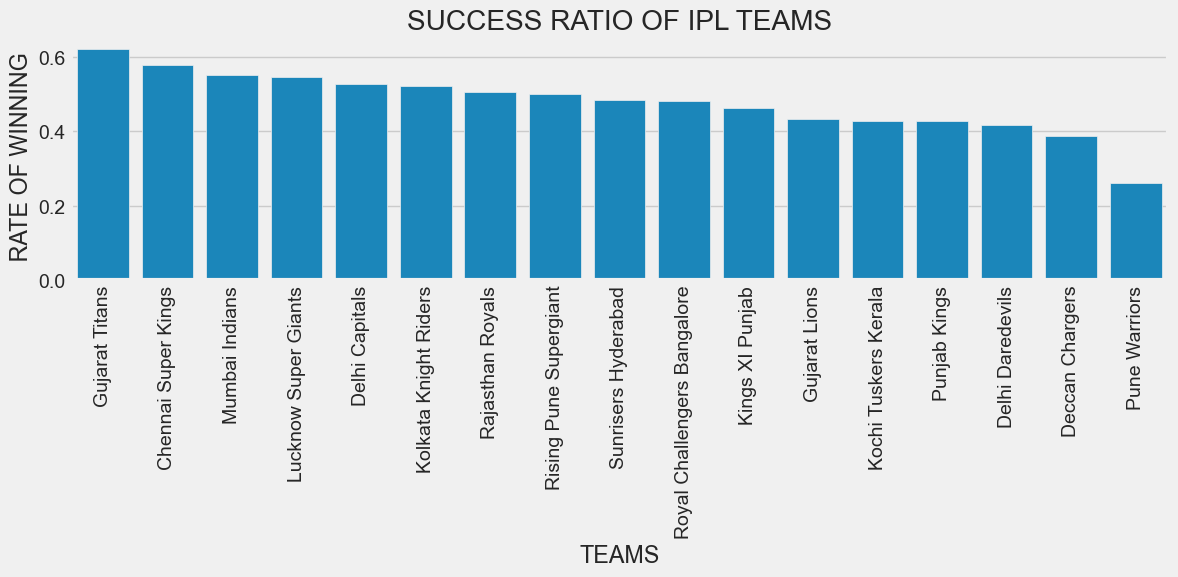

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=success_rates_descending.index,y=success_rates_descending.values)
plt.title('SUCCESS RATIO OF IPL TEAMS')
plt.xlabel('TEAMS')
plt.ylabel(' RATE OF WINNING')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

most title winners

In [58]:
winner_counts=matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()
winner_counts

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

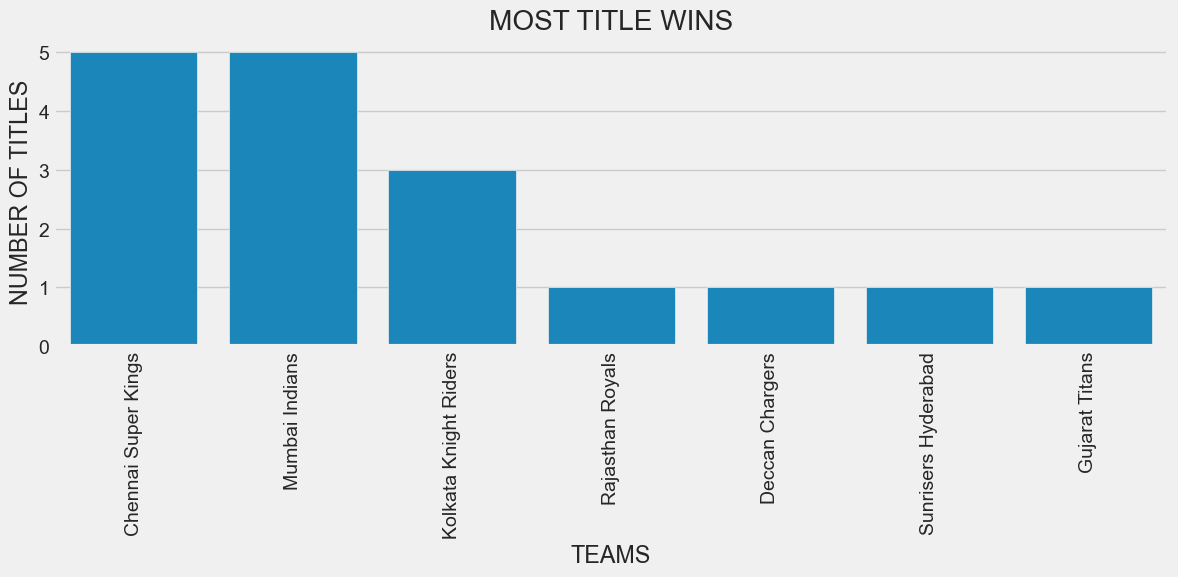

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x=winner_counts.index,y=winner_counts.values)
plt.title('MOST TITLE WINS')
plt.xlabel('TEAMS')
plt.ylabel('NUMBER OF TITLES')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

top 10 players with most runs

In [66]:
batter_total_runs=deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')
batter_total_runs

,batter,Runs
0,A Ashish Reddy,280
1,A Badoni,634
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
668,Yashpal Singh,47
669,Younis Khan,3
670,Yudhvir Singh,22
671,Yuvraj Singh,2754


In [68]:
top_10_baters=batter_total_runs.sort_values(by='Runs',ascending=False)[:10]
top_10_baters

,batter,Runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


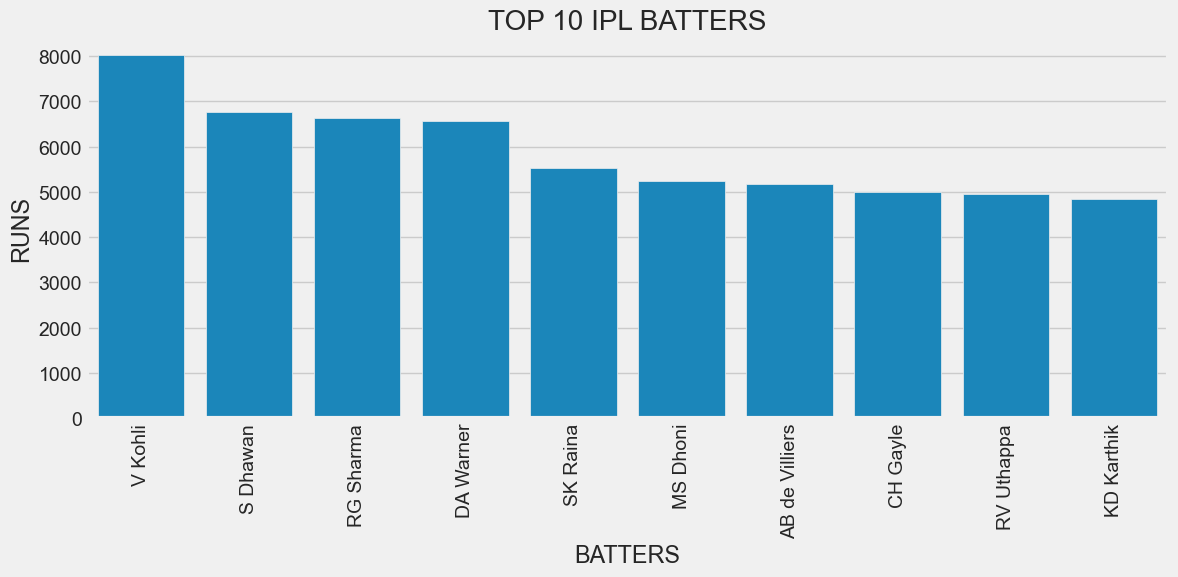

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='batter',y='Runs',data=top_10_baters)
plt.title('TOP 10 IPL BATTERS')
plt.xlabel('BATTERS')
plt.ylabel('RUNS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

top10 players with best strike rates in IPL

In [75]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [77]:
top_performences=deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='Innings_runs')
top_performences

,match_id,batter,Innings_runs
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12
...,...,...,...
16510,1426312,SP Narine,6
16511,1426312,SS Iyer,6
16512,1426312,Shahbaz Ahmed,8
16513,1426312,TM Head,0


In [79]:
top_10_performences=top_performences.sort_values(by='Innings_runs',ascending=False)[:10]
top_10_performences

,match_id,batter,Innings_runs
5302,598027,CH Gayle,175
2,335982,BB McCullum,158
14108,1304112,Q de Kock,140
7528,829795,AB de Villiers,133
11583,1216510,KL Rahul,132
15383,1370352,Shubman Gill,129
8359,980987,AB de Villiers,129
4687,548372,CH Gayle,128
10149,1136602,RR Pant,128
2237,419137,M Vijay,127


In [81]:
balls_faced=deliveries.groupby(['match_id','batter'])['batsman_runs'].count().reset_index(name='Balls faced')
balls_faced

,match_id,batter,Balls faced
0,335982,AA Noffke,12
1,335982,B Akhil,2
2,335982,BB McCullum,77
3,335982,CL White,10
4,335982,DJ Hussey,12
...,...,...,...
16510,1426312,SP Narine,2
16511,1426312,SS Iyer,3
16512,1426312,Shahbaz Ahmed,7
16513,1426312,TM Head,1


In [83]:
data_table=pd.merge(top_10_performences,balls_faced,how='inner',on=['match_id','batter'])
data_table

,match_id,batter,Innings_runs,Balls faced
0,598027,CH Gayle,175,69
1,335982,BB McCullum,158,77
2,1304112,Q de Kock,140,71
3,829795,AB de Villiers,133,61
4,1216510,KL Rahul,132,70
5,1370352,Shubman Gill,129,63
6,980987,AB de Villiers,129,53
7,548372,CH Gayle,128,62
8,1136602,RR Pant,128,64
9,419137,M Vijay,127,57


In [85]:
data_table['Strike Rate For Matches']=np.round(data_table['Innings_runs']*100/data_table['Balls faced'],2)
data_table

,match_id,batter,Innings_runs,Balls faced,Strike Rate For Matches
0,598027,CH Gayle,175,69,253.62
1,335982,BB McCullum,158,77,205.19
2,1304112,Q de Kock,140,71,197.18
3,829795,AB de Villiers,133,61,218.03
4,1216510,KL Rahul,132,70,188.57
5,1370352,Shubman Gill,129,63,204.76
6,980987,AB de Villiers,129,53,243.40
7,548372,CH Gayle,128,62,206.45
8,1136602,RR Pant,128,64,200.00
9,419137,M Vijay,127,57,222.81


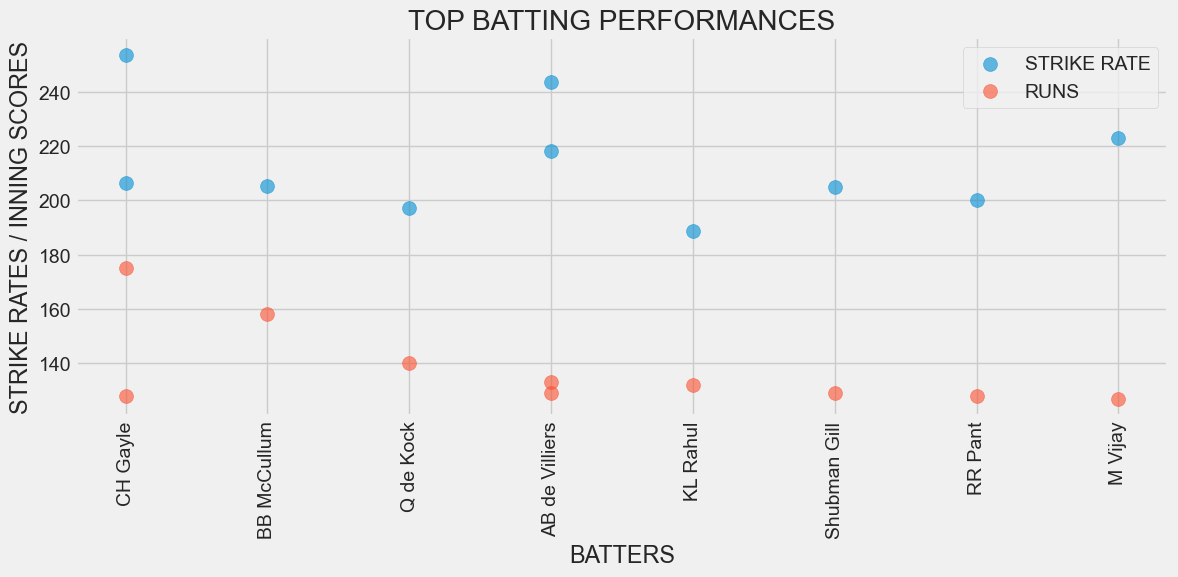

In [135]:
plt.figure(figsize=(12,6))
plt.scatter(data_table['batter'],data_table['Strike Rate For Matches'],label='STRIKE RATE',s=100,alpha=0.6)
plt.scatter(data_table['batter'],data_table['Innings_runs'],label='RUNS',s=100,alpha=0.6)
plt.title('TOP BATTING PERFORMANCES')
plt.xlabel('BATTERS')
plt.ylabel('STRIKE RATES / INNING SCORES')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [89]:
#HERE WE CAN SEE ONLY 8 BATTES AS CRIS GAYLE AND AB DE VILLIERS PERFORMED BEST TWICE.

Top 10 bowlers

In [123]:
bowling_wickets=deliveries[deliveries['dismissal_kind'] != 'run out']
top_10_bowlers=bowling_wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by='Wickets',ascending=False)[:10]
top_10_bowlers

,bowler,Wickets
524,YS Chahal,205
348,PP Chawla,192
119,DJ Bravo,183
355,R Ashwin,181
71,B Kumar,181
446,SP Narine,180
8,A Mishra,174
438,SL Malinga,170
193,JJ Bumrah,168
373,RA Jadeja,160


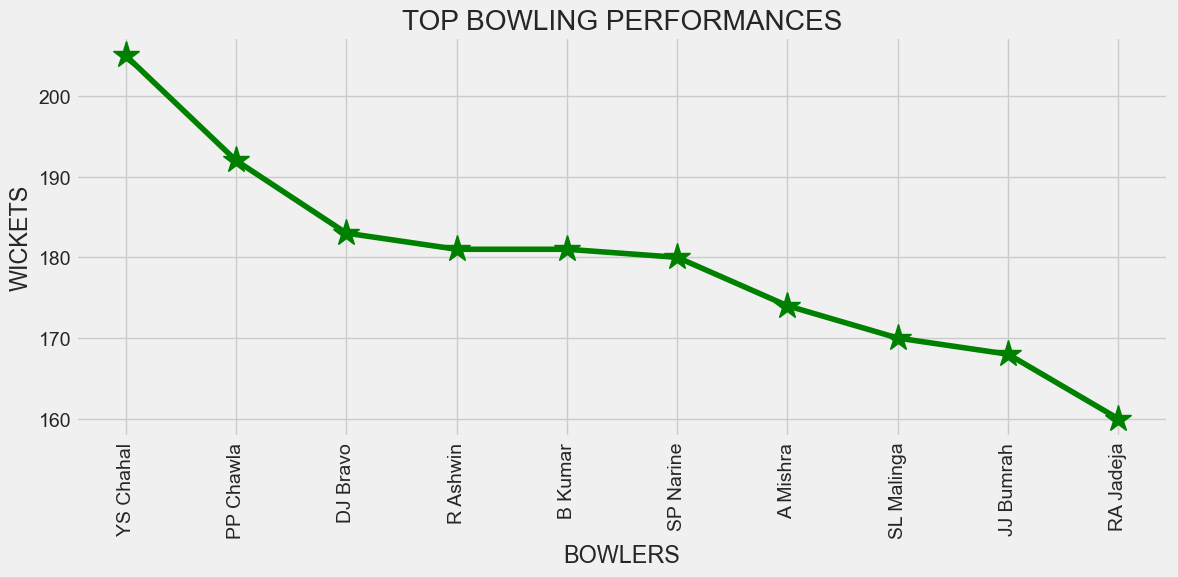

In [139]:
plt.figure(figsize=(12,6))
plt.plot(top_10_bowlers['bowler'],top_10_bowlers['Wickets'],marker="*",color='green',ms=20)
plt.title('TOP BOWLING PERFORMANCES')
plt.xlabel('BOWLERS')
plt.ylabel('WICKETS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 10 cities by number of matches

In [156]:
top_cities=matches['city'].value_counts().reset_index(name='Match Count')[:10]
top_cities

,city,Match Count
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77
5,Bangalore,65
6,Chandigarh,61
7,Jaipur,57
8,Unknown,51
9,Pune,51


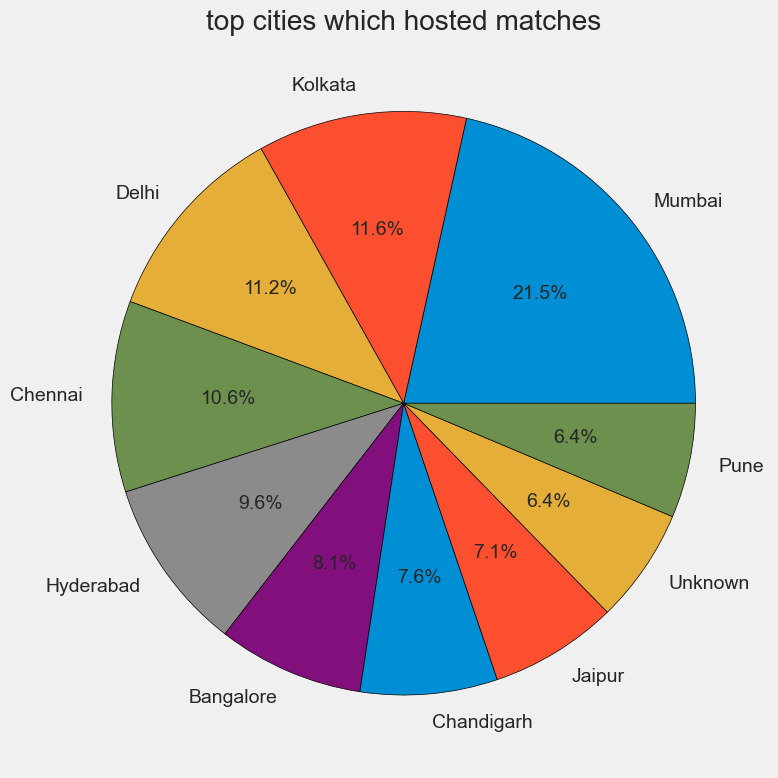

In [174]:
plt.figure(figsize=(8,8))
plt.pie( top_cities['Match Count'],labels=top_cities['city'],autopct='%1.1f%%',wedgeprops=dict(edgecolor='black'))
plt.title('top cities which hosted matches')
plt.tight_layout()
plt.show()

Analysis over by over

In [185]:
over_summery=deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()
over_summery

,total_runs,is_wicket,extra_runs,batsman_runs
over,,,,
0,13651,463,1257,12394
1,16163,503,1266,14897
2,17895,533,961,16934
3,18415,548,905,17510
4,18565,576,812,17753
5,18528,540,887,17641
6,14839,444,804,14035
7,15981,472,721,15260
8,16639,537,724,15915


Text(0, 0.5, 'wickets')

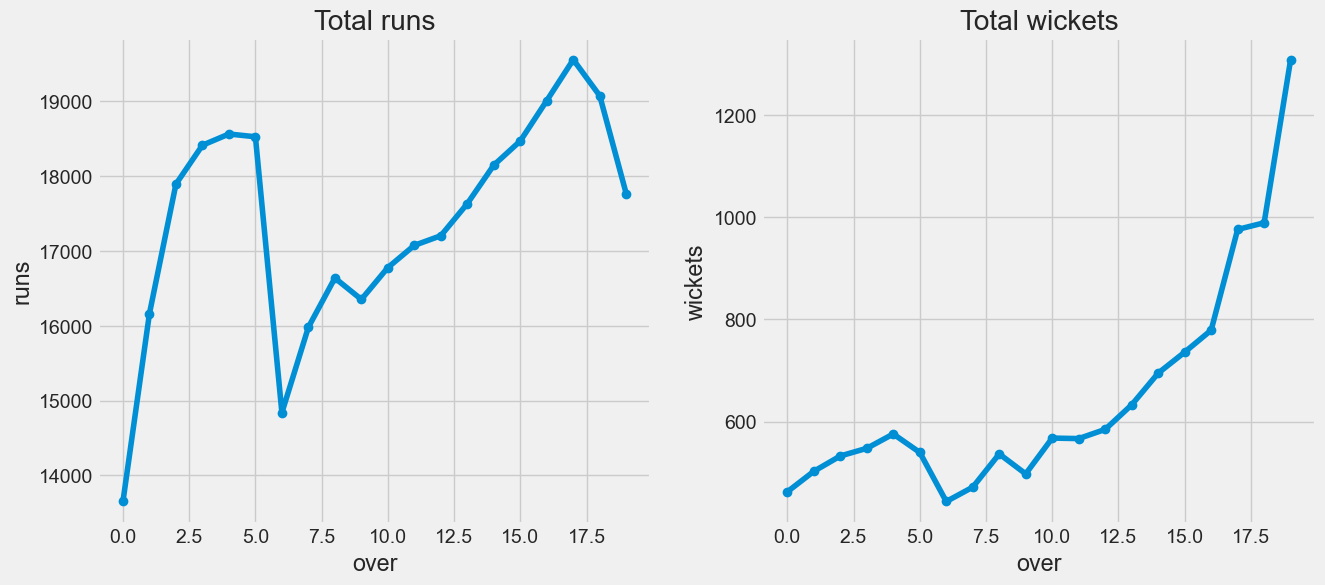

In [203]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
axes[0].plot(over_summery.index,over_summery['total_runs'],marker='o')
axes[0].set_title('Total runs')
axes[0].set_xlabel('over')
axes[0].set_ylabel('runs')

axes[1].plot(over_summery.index,over_summery['is_wicket'],marker='o')
axes[1].set_title('Total wickets')
axes[1].set_xlabel('over')
axes[1].set_ylabel('wickets')